#### Model development Practice !!

Import require Library!

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests 

Link of dataset from databases. 

In [164]:
link = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
file_name = 'automobileEDA.csv'


In [165]:
response = requests.get(link)

if response.status_code == 200:
    with open(file_name, 'wb') as f:
        f.write(response.content)
        
df = pd.read_csv(file_name, header=0)

In [166]:
df.head()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


##### Simple Linear Regression and Multiple Linear Regression!!

Let's load the modules for linear regression:

In [167]:
from sklearn.linear_model import LinearRegression

Create Linear Regression 

In [168]:
lm = LinearRegression()
lm

LinearRegression()

In [169]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

highway-mpg help us predict car price. Price is dependent variable and highhway-mpg is independent variable,

In [170]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using Python for machine learning and data analysis

In [171]:
lm.fit(X, Y)

LinearRegression()

In [172]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Value of intercept (a)

In [173]:
lm.intercept_

38423.3058581574

Value of slope (b)

In [174]:
lm.coef_

array([-821.73337832])

Final estimate value of linear model.
Yhat = a + bX
a = lm.intercept
b = lm.coef
X = independent variable 

In [175]:
Yhat = 38423.30 - 821.73*X

price = 38423.30 - 821.73 * df[['highway-mpg']]

## Multiple Linear Regression

In [176]:
# As far know from previous section of EDA, Horsepower, Curb-weight, Engine-size, Highway-mpg are good predictors of price: 

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [177]:
# Fit the linear model using the four above-mentioned variables.

lm.fit(Z, df[['price']])

LinearRegression()

In [178]:
# Value of intercept(a),
lm.intercept_

array([-15806.62462633])

In [179]:
#What is the value of coefficient (b)?
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [180]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

In [181]:
#coefficient of b, 
lm2.coef_

array([   1.49789586, -820.45434016])

In [182]:
# Intercept of (a), 

lm2.intercept_

38201.31327245727

### Model Evaluation Using Visualization,  

In [183]:
import seaborn as sns 
%matplotlib inline

### Regression Plot, 

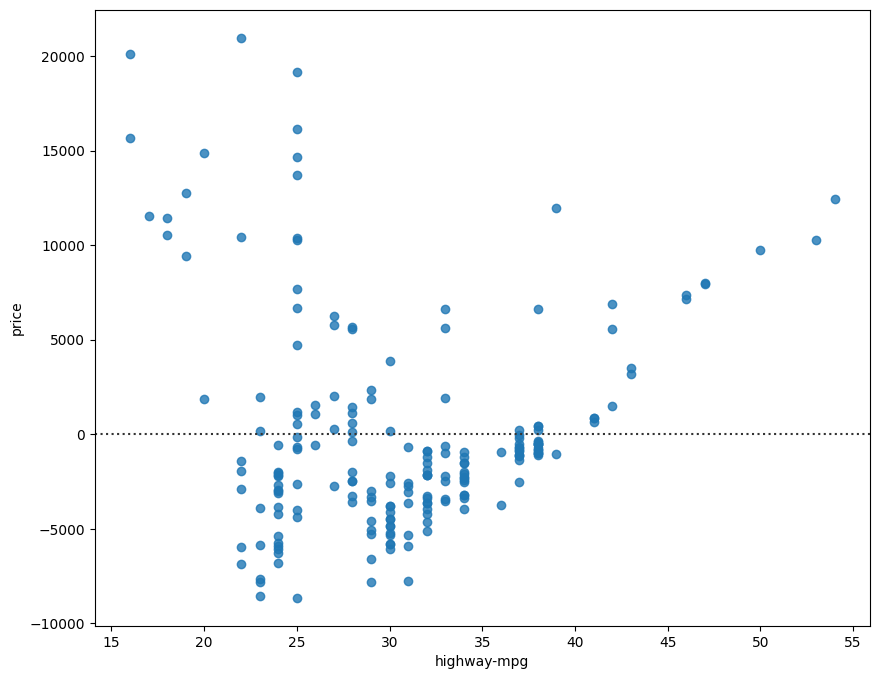

In [184]:
width = 10 
height = 8

plt.figure(figsize=(width, height))
sns.residplot(x = df['highway-mpg'],y = df['price'])
plt.show()

we can see that residual plot is not randomly spread around the x-axis so this figure is leading us a non-linear model for this data. 

#### Visualize of Multiple Linear Regression Model!!

For the multiple linear regression model is not possible to visualize on regression line or residual plot. So with the distribution plot, we can see the distribution plot. We can see the fitted values that result from the model and compare it to distribution of actual values.

In [185]:
Y_hat = lm.predict(Z)

C:\Users\Shahina Islam Tripty\AppData\Local\Temp\ipykernel_2516\3319057610.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'actual value')
e:\new-project\python_library_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\new-project\python_library_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

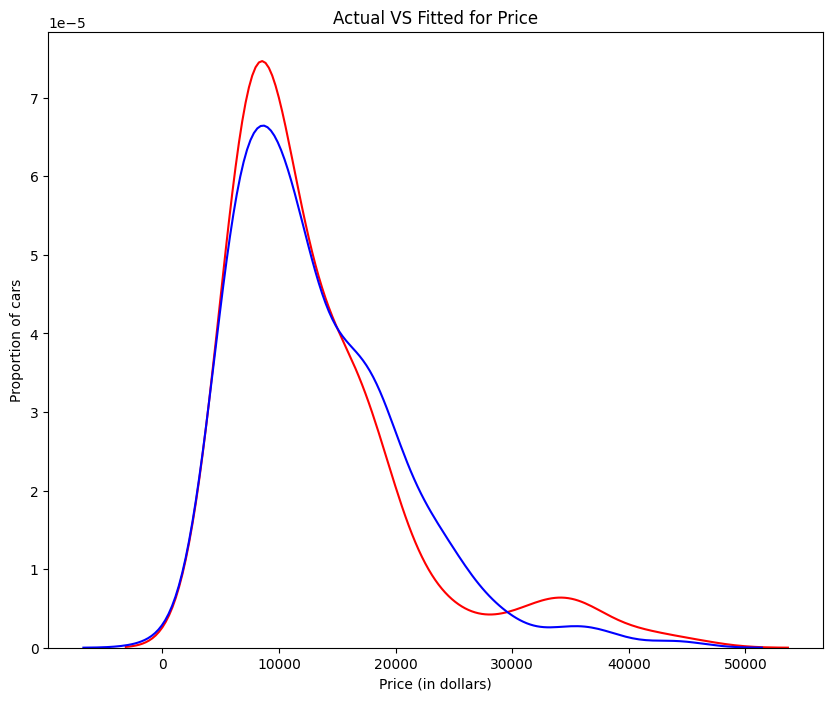

In [186]:
# set size of the plot,
plt.figure(figsize=(width, height))

# create the plot,
ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'actual value')
sns.distplot(Y_hat, hist = False, color = 'b', label = 'fitted value', ax = ax1)

# Set plot title and labels, 
plt.title('Actual VS Fitted for Price')
plt.xlabel ('Price (in dollars)')
plt.ylabel ('Proportion of cars')

# Show the plot, 
plt.show()
plt.close()


##### we can see the fitted values are reasonably close to the actual values since the two distributions overlap a bit. 

### Polynomial Regression and Pipelines

###### Polynomial regression model is a particular case of linear regression and multiple regression models. We get nonlinear relationships by squaring or setting higher-order terms of predictor variables. 

In [187]:
#lets get the variables, 
x = df['highway-mpg']
y = df['price']

In [188]:
# Lets fit the polynomial using function polyfit and then use function poly1d to display the polynomial function!!
# Here we use a polynomial of the 3rd order, 

f = np.polyfit(x,y,3)
p = np.poly1d(f)

print (p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [191]:
# Now lets plot the function, 

PlotPolly (p, x, y, 'highway-mpg')

NameError: name 'PlotPolly' is not defined